# Pymaceuticals Inc.
---

### Analysis

*Tumor Volume Reduction: The box plot analysis of the four treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) shows that Capomulin and Ramicane are more effective in reducing tumor volume compared to Infubinol and Ceftamin. The median tumor volume of mice treated with Capomulin and Ramicane is significantly lower, indicating their potential efficacy in tumor suppression.

*Mouse Weight Correlation: There is a strong positive correlation (correlation coefficient ≈ 0.84) between mouse weight and the average observed tumor volume for the Capomulin regimen. Heavier mice tend to have larger tumor volumes, indicating that the mouse's body weight may influence tumor growth.

*Potential Outliers: In the Infubinol treatment group, there is a potential outlier with a tumor volume of around 36.32 mm3. This outlier could indicate either an unusual response to the treatment or an error in the data collection. Further investigation and validation are required to determine the cause of this potential outlier.
 

In [201]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = len(study_data_complete_df["Mouse ID"].unique())
total_mice

249

In [4]:
duplicate_mice = study_data_complete_df[study_data_complete_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Extract unique identifiers (Mouse ID and Timepoint) from the duplicate mice
unique_identifiers = duplicate_mice.loc[:, ["Mouse ID", "Timepoint"]].drop_duplicates()

# Get the duplicate mice by ID number that show up for Mouse ID and Timepoint.
duplicate_mice_ID = duplicate_mice["Mouse ID"].unique()
print(duplicate_mice_ID)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_by_ID = study_data_complete_df.loc[
    study_data_complete_df["Mouse ID"].isin(duplicate_mice_ID)]
duplicate_mice_by_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = study_data_complete_df.loc[
    study_data_complete_df["Mouse ID"].isin(duplicate_mice_ID) == False]
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = len(clean_mouse_data["Mouse ID"].unique())
print(clean_mice_data)

248


## Summary Statistics

In [8]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# mean_by_group = [s['MEDV'].mean()
# # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# # mean, median, variance, standard deviation, and SEM of the tumor volume. 
# # Assemble the resulting series into a single summary DataFrame.

#Each Drug Regimen by group
means = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sds = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary = pd.DataFrame({'Mean Tumor Volume': means,
                        'Median Tumor Volume': medians,
                        'Tumor Vol Variance': variances,
                        'Tumor Vol Std': sds,
                        'Tumor Vol Serr': sems})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Vol Variance,Tumor Vol Std,Tumor Vol Serr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_in_line = clean_mouse_data.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])
summary_in_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

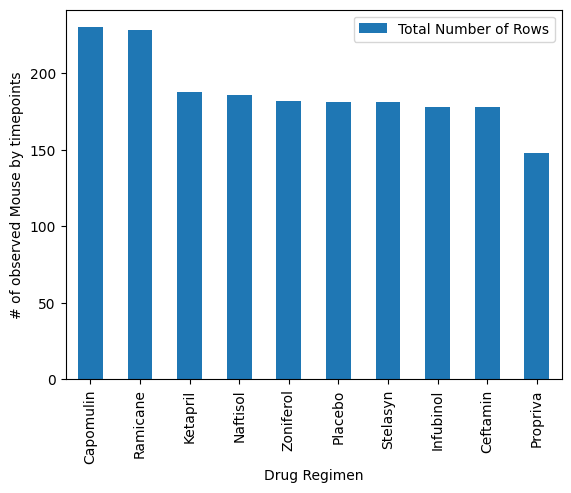

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Generate total n's of rows for each drug regimen
total_rows_by_regimen = clean_mouse_data["Drug Regimen"].value_counts()

#Generate a DataFrame for the total number of rows
total_rows_df = pd.DataFrame(total_rows_by_regimen).reset_index()
total_rows_df.columns = ["Drug Regimen", "Total Number of Rows"]

#Plot the bar chart
total_rows_df.plot(x="Drug Regimen", y="Total Number of Rows" ,kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse by timepoints")
plt.xticks(rotation=90)
plt.show()

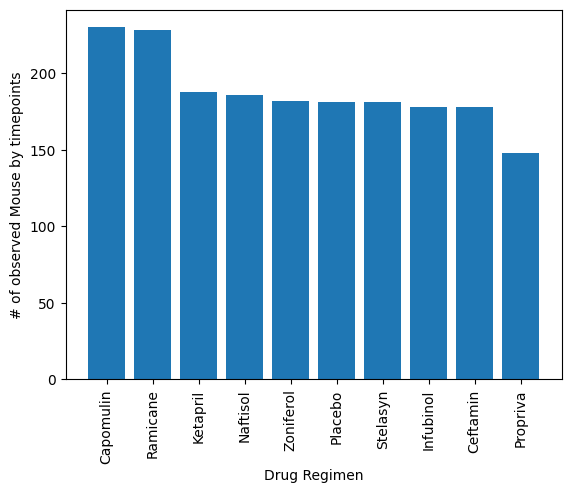

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Generate total n's of rows for each drug regimen
total_rows_by_regimen = clean_mouse_data["Drug Regimen"].value_counts()

#Generate a DataFrame for the total number of rows
total_rows_df = pd.DataFrame(total_rows_by_regimen).reset_index()
total_rows_df.columns = ["Drug Regimen", "Total Number of Rows"]

#Plot the bar chart
plt.bar(total_rows_df["Drug Regimen"], total_rows_df["Total Number of Rows"])
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse by timepoints")
plt.xticks(rotation=90)
plt.show()

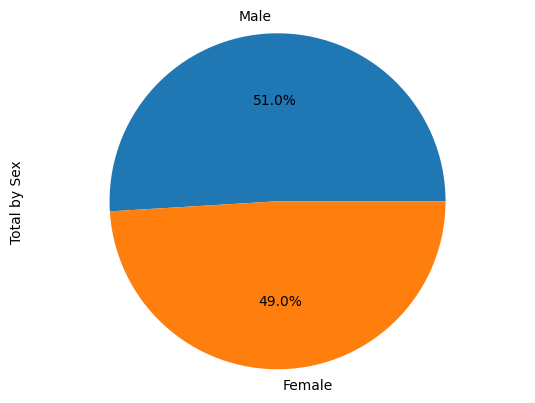

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Generate total n's of rows for each gender
total_rows_by_sex = clean_mouse_data["Sex"].value_counts()

# #Generate a DataFrame for the total number of gender
total_rows_by_sex_df = pd.DataFrame(total_rows_by_sex).reset_index()
total_rows_by_sex_df.columns = ["Sex", "Total by Sex"]

#Plot the pie chart
total_rows_by_sex_df.plot(x="Sex", y="Total by Sex" ,kind="pie", legend=False, labels=total_rows_by_sex_df["Sex"], autopct='%1.1f%%')
plt.axis("equal")
plt.show()

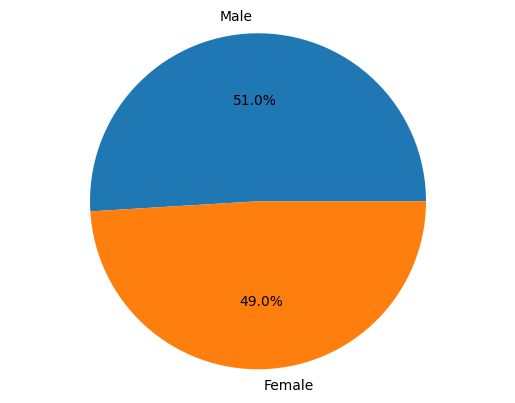

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Generate total n's of rows for each gender
total_rows_by_sex = clean_mouse_data["Sex"].value_counts()

# #Generate a DataFrame for the total number of gender
total_rows_by_sex_df = pd.DataFrame(total_rows_by_sex).reset_index()
total_rows_by_sex_df.columns = ["Sex", "Total by Sex"]

#Plot the pie chart
plt.pie(total_rows_by_sex_df["Total by Sex"], labels=total_rows_by_sex_df["Sex"], autopct='%1.1f%%')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume_regimen = total_rows_df[total_rows_df["Drug Regimen"].isin(treatment_regimens)]

# # Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = greatest_timepoint.merge(clean_mouse_data,on=['Mouse ID','Timepoint'],how="left")
final_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [169]:
# Put treatments into a list for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    current_regimen_data = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == regimen, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(current_regimen_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = current_regimen_data.quantile([0.25,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = current_regimen_data[(current_regimen_data < lower_bound) | (current_regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


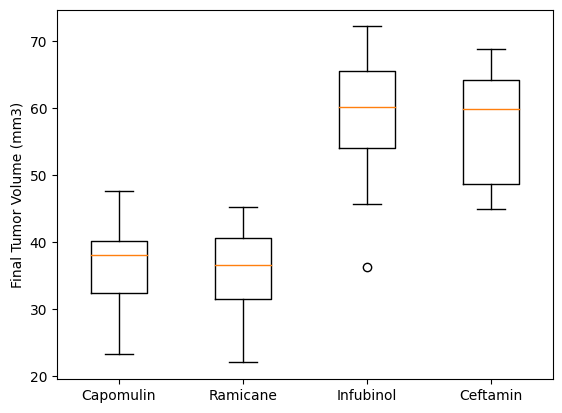

In [173]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure()
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.ylabel("Final Tumor Volume (mm3)")
red_out = dict(markerfacecolor="red", markersize=14)
plt.show()

## Line and Scatter Plots

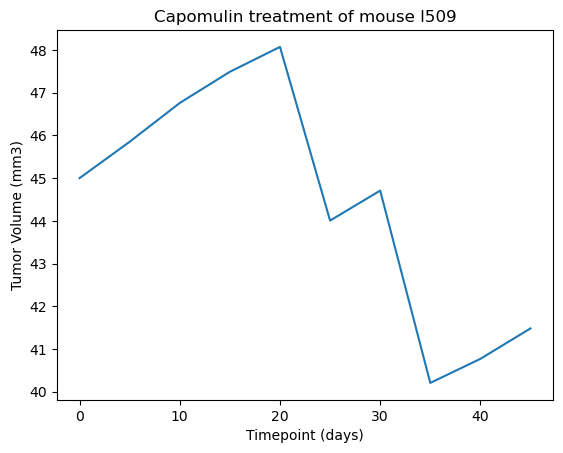

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']

timepoints = mousedata["Timepoint"]
tumor_volume = mousedata["Tumor Volume (mm3)"]
plt.plot(tumor_volume, timepoints, marker='o', color='b')

# Convert time points to days by subtracting the initial time point from each time point
initial_timepoint = timepoints.min()
timepoints_days = timepoints - initial_timepoint

# Create the line plot
plt.plot(timepoints_days, tumor_volume, marker='o', color='b')
plt.title("Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

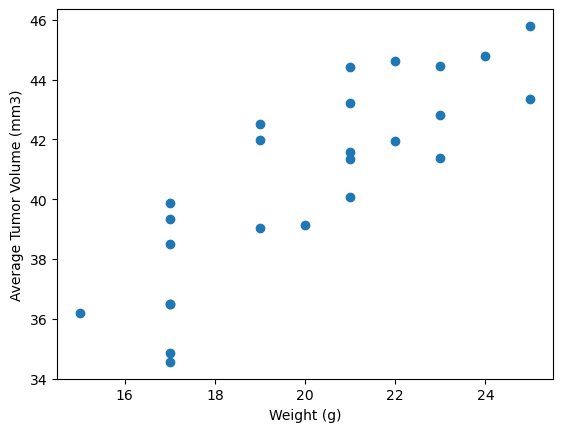

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame to obtain data for the Capomulin regimen
capomulin_data = capomulin_table[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Create a DataFrame to store the average tumor volume and corresponding mouse weights
average_tumor_volume_df = pd.DataFrame({'Average Tumor Volume (mm3)': average_tumor_volume})

# Merge the average tumor volume DataFrame with the original Capomulin DataFrame based on the Mouse ID
merged_data = pd.merge(capomulin_data, average_tumor_volume_df, on='Mouse ID')

# Remove duplicate rows to keep only unique Mouse ID entries and their corresponding average tumor volume and weight
unique_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Average Tumor Volume (mm3)', 'Weight (g)'])

# Extract weight and average tumor volume for the scatter plot
mouse_weights = unique_data['Weight (g)']
average_tumor_volumes = unique_data['Average Tumor Volume (mm3)']

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volumes, marker='o', alpha=0.7)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


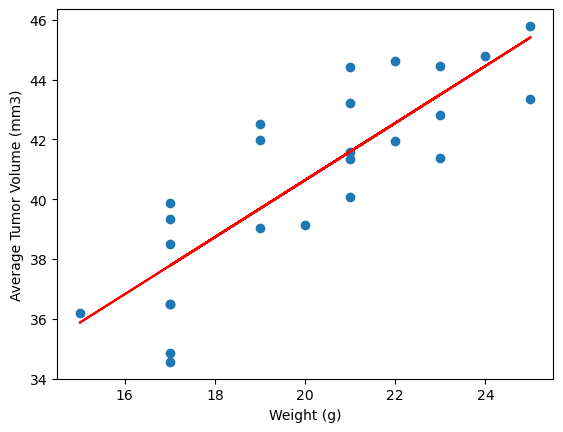

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weights = unique_data['Weight (g)'].values
average_tumor_volumes = unique_data['Average Tumor Volume (mm3)'].values

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weights, average_tumor_volumes)
print(f"Correlation coefficient: {correlation_coefficient:.2f}")

# Perform linear regression
model = LinearRegression()
model.fit(mouse_weights[:, np.newaxis], average_tumor_volumes)

# Get the coefficient of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear regression model: y = {slope:.2f}x + {intercept:.2f}")

# Plot the scatter plot & regression line
plt.scatter(mouse_weights, average_tumor_volumes, marker='o', edgecolors='black', alpha=0.7)
plt.plot(mouse_weights, model.predict(mouse_weights[:, np.newaxis]), color='red', linestyle='--')

# Set the title and labels for the plot
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()